In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd

In [25]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [29]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [32]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15ed2114f98>,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

In [33]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15ed2165710>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [34]:
# Design a query to retrieve the last 12 months of precipitation data 
session.query(Measurement.date, Measurement.prcp, Measurement.id, Measurement.tobs, Measurement.station)\
.filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()


[('2016-08-24', 0.08, 2365, 79.0, 'USC00519397'),
 ('2016-08-24', 2.15, 5092, 76.0, 'USC00513117'),
 ('2016-08-24', 2.28, 7332, 80.0, 'USC00514830'),
 ('2016-08-24', None, 8826, 78.0, 'USC00517948'),
 ('2016-08-24', 1.22, 11852, 79.0, 'USC00519523'),
 ('2016-08-24', 2.15, 14609, 77.0, 'USC00519281'),
 ('2016-08-24', 1.45, 19203, 74.0, 'USC00516128'),
 ('2016-08-25', 0.08, 2366, 80.0, 'USC00519397'),
 ('2016-08-25', 0.08, 5093, 77.0, 'USC00513117'),
 ('2016-08-25', 0.0, 7333, 81.0, 'USC00514830'),
 ('2016-08-25', 0.0, 8827, 81.0, 'USC00517948'),
 ('2016-08-25', 0.21, 11853, 80.0, 'USC00519523'),
 ('2016-08-25', 0.06, 14610, 80.0, 'USC00519281'),
 ('2016-08-25', 0.11, 19204, 77.0, 'USC00516128'),
 ('2016-08-26', 0.0, 2367, 79.0, 'USC00519397'),
 ('2016-08-26', 0.03, 5094, 78.0, 'USC00513117'),
 ('2016-08-26', 0.02, 7334, 81.0, 'USC00514830'),
 ('2016-08-26', 0.04, 8828, 81.0, 'USC00517948'),
 ('2016-08-26', 0.0, 11854, 84.0, 'USC00519523'),
 ('2016-08-26', 0.01, 14611, 80.0, 'USC00519281

In [35]:
#Select only the `date` and `prcp` values.
for row in session.query(Measurement.date, Measurement.prcp).limit(15).all():
    print(row)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)


In [71]:
# Save the query results as a Pandas DataFrame and set the index to the date column
results = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()

df = pd.DataFrame(results[:10], columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.head(10)

,prcp
date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


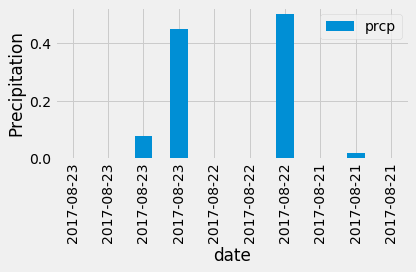

In [73]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot.bar()
plt.ylabel("Precipitation")
plt.tight_layout()

![precipitation](Images/precipitation.png)

In [54]:
# Use Pandas to print the summary statistics for the precipitation data.--Count

prcp_count=session.query(func.count(Measurement.prcp)).all()
prcp_count

[(18103)]

In [55]:
# Use Pandas to print the summary statistics for the precipitation data.--Average

prcp_avg=session.query(func.avg(Measurement.prcp)).all()
prcp_avg

[(0.16064353974479206)]

In [56]:
# Use Pandas to print the summary statistics for the precipitation data.--Minimum

prcp_min=session.query(func.min(Measurement.prcp)).all()
prcp_min

[(0.0)]

In [57]:
# Use Pandas to print the summary statistics for the precipitation data.--Maximum

prcp_max=session.query(func.max(Measurement.prcp)).all()
prcp_max

[(11.53)]

In [53]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).count()

9

In [46]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# session.query(Measurement.station, Measurement.tobs).order_by(Measurement.tobs.desc()).all()

sel = [Measurement.station, 
       func.count(Measurement.tobs)]

most_rows= session.query(*sel).group_by(Measurement.station).order_by(Measurement.tobs.desc()).all()

most_rows

[('USC00517948', 1372),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00519397', 2724)]

In [47]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

sel = [Measurement.station, 
       func.min(Measurement.tobs)]

lowest_temp= session.query(*sel).filter(Measurement.station == "USC00519281").all()

lowest_temp

[('USC00519281', 54.0)]

In [48]:
# highest temperature recorded, 
sel = [Measurement.station, 
       func.max(Measurement.tobs)]

highest_temp= session.query(*sel).filter(Measurement.station == "USC00519281").all()

highest_temp

[('USC00519281', 85.0)]

In [49]:
# and average temperature most active station?
sel = [Measurement.station, 
       func.avg(Measurement.tobs)]

average_temp= session.query(*sel).filter(Measurement.station == "USC00519281").all()

average_temp

[('USC00519281', 71.66378066378067)]

In [50]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
session.query(Measurement.station, Measurement.tobs, Measurement.date)\
.filter(Measurement.station == "USC00519281")\
.filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()


[('USC00519281', 77.0, '2016-08-24'),
 ('USC00519281', 80.0, '2016-08-25'),
 ('USC00519281', 80.0, '2016-08-26'),
 ('USC00519281', 75.0, '2016-08-27'),
 ('USC00519281', 73.0, '2016-08-28'),
 ('USC00519281', 78.0, '2016-08-29'),
 ('USC00519281', 77.0, '2016-08-30'),
 ('USC00519281', 78.0, '2016-08-31'),
 ('USC00519281', 80.0, '2016-09-01'),
 ('USC00519281', 80.0, '2016-09-02'),
 ('USC00519281', 78.0, '2016-09-03'),
 ('USC00519281', 78.0, '2016-09-04'),
 ('USC00519281', 78.0, '2016-09-05'),
 ('USC00519281', 73.0, '2016-09-06'),
 ('USC00519281', 74.0, '2016-09-07'),
 ('USC00519281', 80.0, '2016-09-08'),
 ('USC00519281', 79.0, '2016-09-09'),
 ('USC00519281', 77.0, '2016-09-10'),
 ('USC00519281', 80.0, '2016-09-11'),
 ('USC00519281', 76.0, '2016-09-12'),
 ('USC00519281', 79.0, '2016-09-13'),
 ('USC00519281', 75.0, '2016-09-14'),
 ('USC00519281', 79.0, '2016-09-15'),
 ('USC00519281', 78.0, '2016-09-16'),
 ('USC00519281', 79.0, '2016-09-17'),
 ('USC00519281', 78.0, '2016-09-18'),
 ('USC005192

In [68]:
results = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.date.desc()).all()

df2 = pd.DataFrame(results[:10], columns=['date', 'tobs'])
df2.set_index('date', inplace=True)
df2.head(10)

,tobs
date,
2017-08-23,81.0
2017-08-23,82.0
2017-08-23,82.0
2017-08-23,76.0
2017-08-22,82.0
2017-08-22,82.0
2017-08-22,76.0
2017-08-21,81.0
2017-08-21,79.0


![precipitation](Images/station-histogram.png)

Text(0, 0.5, 'Frequency')

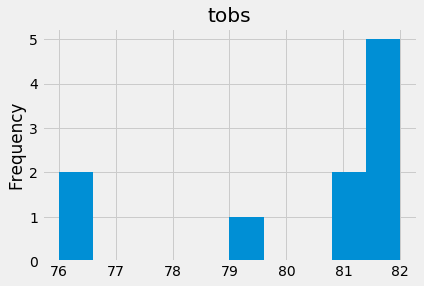

In [75]:
#plot the results as a histogram
df2.hist(column='tobs')
plt.ylabel("Frequency")
